# Case enterview

## Some libraries

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

## Exploratory Data Analysis

### 1. Load data

In [105]:
# import dataset from data/dataset_ds_case.csv
df = pd.read_csv('../data/dataset_ds_case.csv', sep=',')

### 2. Data overview and statistics

In [106]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,total_quantity,augmented_quantity,FU,City,CEP,date_time_login,date_time_confirm,TARGET
0,-400.732711,72.926478,-243.059370,87.928551,568.211458,-314.371508,-601.964793,617.692215,123,569,ES,Vitória,29072305,2022-06-05 02:14:15,2022-06-05 02:14:21,1
1,-880.747368,-956.608685,1254.880642,-295.771103,-4279.430521,-1540.310595,-376.902843,-550.748455,108,184,RJ,Rio de Janeiro,23580304,2022-05-15 08:04:36,2022-05-15 08:04:52,0
2,1466.142174,-254.237053,27.568952,-607.225752,-133.657056,1300.214330,254.241280,970.543987,116,384,RJ,Nova Iguaçu,26220320,2022-05-03 17:14:40,2022-05-03 17:14:49,0
3,-528.482231,1100.676006,-718.090372,-97.394485,-2962.996039,-1356.790309,1034.567734,-68.548963,100,0,RJ,Nova Iguaçu,26089250,2022-06-07 16:56:18,2022-06-07 16:56:26,0
4,1648.290257,1317.673828,-1102.974635,448.956842,-332.796029,1163.003660,-1560.440766,1844.630048,107,161,MG,Contagem,32046360,2022-04-05 00:19:15,2022-04-05 00:19:26,0


<AxesSubplot: xlabel='TARGET', ylabel='count'>

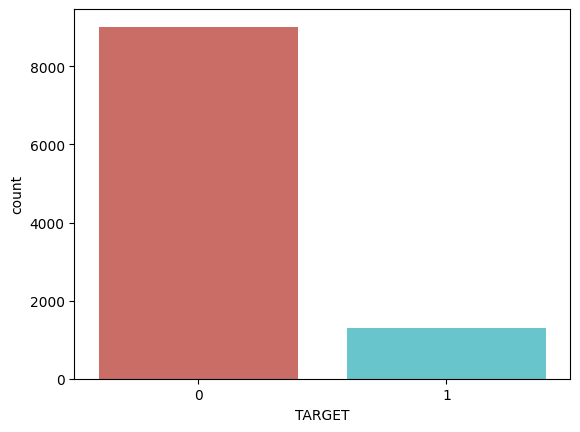

In [107]:
# distribution of TARGET
sns.countplot(x='TARGET', data=df, palette='hls')

This means that the data is not balanced. We have more 0s than 1s. This is a problem because the model will be biased towards 0s. We will need to balance the data.

In [108]:
# create column delta_time
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10303 entries, 0 to 10302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   col_0               10303 non-null  float64
 1   col_1               10303 non-null  float64
 2   col_2               10303 non-null  float64
 3   col_3               10303 non-null  float64
 4   col_4               10303 non-null  float64
 5   col_5               10303 non-null  float64
 6   col_6               10303 non-null  float64
 7   col_7               10303 non-null  float64
 8   total_quantity      10303 non-null  int64  
 9   augmented_quantity  10303 non-null  int64  
 10  FU                  10303 non-null  object 
 11  City                10303 non-null  object 
 12  CEP                 10303 non-null  int64  
 13  date_time_login     10303 non-null  object 
 14  date_time_confirm   10303 non-null  object 
 15  TARGET              10303 non-null  int64  
dtypes: f

We can see here that the data contains datatypes that does not make sense with the column description. For example, date_time_login and date_time_confirm are not datetimes. We will by using the following cell convert the columns to the correct datatypes.

In [109]:
# use a dict to convert specific columns to specific types
convert_dict = {'col_0'              : 'float64',
                'col_1'              : 'float64',
                'col_2'              : 'float64',
                'col_3'              : 'float64',
                'col_4'              : 'float64',
                'col_5'              : 'float64',
                'col_6'              : 'float64',
                'col_7'              : 'float64',
                'total_quantity'     : 'int64',
                'augmented_quantity' : 'int64',
                'FU'                 : 'object',
                'City'               : 'object',
                'CEP'                : 'int64',
                'date_time_login'    : 'datetime64[ns]',
                'date_time_confirm'  : 'datetime64[ns]',
                'TARGET'             : 'int64'}

# convert column types
df = df.astype(convert_dict)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10303 entries, 0 to 10302
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   col_0               10303 non-null  float64       
 1   col_1               10303 non-null  float64       
 2   col_2               10303 non-null  float64       
 3   col_3               10303 non-null  float64       
 4   col_4               10303 non-null  float64       
 5   col_5               10303 non-null  float64       
 6   col_6               10303 non-null  float64       
 7   col_7               10303 non-null  float64       
 8   total_quantity      10303 non-null  int64         
 9   augmented_quantity  10303 non-null  int64         
 10  FU                  10303 non-null  object        
 11  City                10303 non-null  object        
 12  CEP                 10303 non-null  int64         
 13  date_time_login     10303 non-null  datetime64

Without knowing the specific context or purpose of the dataset, it is difficult to say exactly what each column represents. However, based on the column names and the information provided, I can make some guesses about the meaning of each column.

- "col_0" through "col_7" appear to be numeric columns that may represent some kind of measurement or calculation. It is not clear what these columns represent, but they may be related to the other variables in the dataset.
- "total_quantity" and "augmented_quantity" may represent quantities of some kind, possibly related to the items or transactions being observed in the dataset.
- "FU" represents the State where the possible transaction occurred.
- "City" and "CEP" represent the city and postal code, respectively, of the location where the observation took place.
- "date_time_login" and "date_time_confirm" may represent the date and time when a particular action or event occurred.
- "TARGET" may represent the outcome or result of the observation.

That said, we also found that the dataset do not have any missing values, which is a good sign.

For our exploratory data analysis, we can add some more information to the dataset by adding a new column that represents the difference between the date_time_login and date_time_confirm columns. This will give us a better idea of how long it took for the transaction to be confirmed.

In [111]:
# create column delta_time
df['delta_time'] = df['date_time_confirm'] - df['date_time_login']
# convert delta_time to seconds
df['delta_time'] = df['delta_time'].dt.total_seconds()

We can also add new columns to the dataset that represent the year, month, day, and hour of the date_time_login and date_time_confirm columns. This will allow us to see if there are any patterns in the data that are related to the time of day or day of the week.

In [112]:
# create column day_of_year, week_of_year, month_of_year, day_of_week, hour_of_day
df['day_of_year'] = df['date_time_login'].dt.dayofyear
df['week_of_year'] = df['date_time_login'].dt.weekofyear
df['month_of_year'] = df['date_time_login'].dt.month
df['day_of_week'] = df['date_time_login'].dt.dayofweek
df['hour_of_day'] = df['date_time_login'].dt.hour
df['hour_of_day_real'] = df['date_time_login'].dt.hour + df['date_time_login'].dt.minute/60

The resulting dataset will look like this:

In [113]:
df.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,total_quantity,augmented_quantity,...,date_time_login,date_time_confirm,TARGET,delta_time,day_of_year,week_of_year,month_of_year,day_of_week,hour_of_day,hour_of_day_real
0,-400.732711,72.926478,-243.059370,87.928551,568.211458,-314.371508,-601.964793,617.692215,123,569,...,2022-06-05 02:14:15,2022-06-05 02:14:21,1,6.0,156,22,6,6,2,2.233333
1,-880.747368,-956.608685,1254.880642,-295.771103,-4279.430521,-1540.310595,-376.902843,-550.748455,108,184,...,2022-05-15 08:04:36,2022-05-15 08:04:52,0,16.0,135,19,5,6,8,8.066667
2,1466.142174,-254.237053,27.568952,-607.225752,-133.657056,1300.214330,254.241280,970.543987,116,384,...,2022-05-03 17:14:40,2022-05-03 17:14:49,0,9.0,123,18,5,1,17,17.233333
3,-528.482231,1100.676006,-718.090372,-97.394485,-2962.996039,-1356.790309,1034.567734,-68.548963,100,0,...,2022-06-07 16:56:18,2022-06-07 16:56:26,0,8.0,158,23,6,1,16,16.933333
4,1648.290257,1317.673828,-1102.974635,448.956842,-332.796029,1163.003660,-1560.440766,1844.630048,107,161,...,2022-04-05 00:19:15,2022-04-05 00:19:26,0,11.0,95,14,4,1,0,0.316667


As we are interested in see some distribuitions of the data, we can rearrange distinct strings in the dataset to a numeric value. For example, the column "FU" has 27 distinct values, but we can rearrange them to a numeric value, like this:

In [114]:
# distincts values of FU
distincts_FU = df['FU'].unique()
print(distincts_FU)
# map FU to index numbers
for i in range(len(distincts_FU)):
    df['FU'] = df['FU'].replace(distincts_FU[i], i)
    
distincts_city = df['City'].unique()
print(distincts_city)
for i in range(len(distincts_city)):
    df['City'] = df['City'].replace(distincts_city[i], i)

['ES' 'RJ' 'MG' 'SP']
['Vitória' 'Rio de Janeiro' 'Nova Iguaçu' 'Contagem' 'São Gonçalo'
 'Duque de Caxias' 'São Paulo' 'Serra' 'Campinas' 'Belo Horizonte'
 'Belford Roxo' 'Juiz de Fora' 'Uberaba' 'Vila Velha' 'Cariacica'
 'Guarulhos' 'Betim' 'São Bernardo do Campo' 'Sorocaba' 'Guarapari']


We can see some statistics of the dataset, like the mean, median, standard deviation, and quartiles, by using the following cells:

In [115]:
cluster_summary = df.groupby('TARGET')
cluster_summary.median()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,total_quantity,augmented_quantity,FU,City,CEP,delta_time,day_of_year,week_of_year,month_of_year,day_of_week,hour_of_day,hour_of_day_real
TARGET,,,,,,,,,,,,,,,,,,,,
0,-255.105929,-3.645642,-3.351869,-8.327094,-435.036814,58.705408,-3.945960,447.547491,120.0,488.0,2.0,6.0,21321090.0,15.0,107.0,15.0,4.0,3.0,12.0,12.0
1,-192.616793,5.374364,-28.351205,-16.555143,-218.834170,-230.119579,21.295732,-7.261078,120.0,488.0,2.0,6.0,21321090.0,15.0,105.0,15.0,4.0,3.0,11.0,11.8


In [116]:
cluster_summary = df.groupby('TARGET')
cluster_summary.mean()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,total_quantity,augmented_quantity,FU,City,CEP,delta_time,day_of_year,week_of_year,month_of_year,day_of_week,hour_of_day,hour_of_day_real
TARGET,,,,,,,,,,,,,,,,,,,,
0,6.843613,-2.245901,-11.322348,3.418134,-450.100408,-0.311333,-10.652012,447.459140,120.285191,505.621963,1.917360,7.545535,2.009249e+07,15.043594,107.269884,15.470549,4.061786,2.976040,11.561287,12.053746
1,-18.419259,-8.677741,-21.454853,5.735984,-262.250340,-249.932288,1.251150,15.884755,119.958075,514.225155,1.927019,7.021739,1.981209e+07,15.024845,105.619565,15.222050,4.002329,3.065217,11.362578,11.852510


We can see that there are some differences on the mean and median of the columns "col_0" through "col_7", which means that there are some outliers in the dataset.

In [117]:
# standard deviation
cluster_summary.std()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,total_quantity,augmented_quantity,FU,City,CEP,delta_time,day_of_year,week_of_year,month_of_year,day_of_week,hour_of_day,hour_of_day_real
TARGET,,,,,,,,,,,,,,,,,,,,
0,956.548224,798.498780,790.684411,804.536264,1072.441606,952.101783,805.701784,690.655073,10.905639,265.139468,1.126729,4.954072,1.020750e+07,3.736047,34.654987,4.962740,1.203528,2.009706,6.878271,6.887323
1,985.799400,812.531945,810.962004,798.549282,1080.605348,976.305282,792.851218,792.487351,10.889347,267.119352,1.121638,4.913027,1.012473e+07,5.032698,34.646865,4.965498,1.194065,1.949742,6.917747,6.933400


In [118]:
# difference between standard deviation of cluster 0 and cluster 1 for each column
cluster_summary.std().iloc[0]/cluster_summary.std().iloc[1]

col_0                 0.970327
col_1                 0.982729
col_2                 0.974996
col_3                 1.007497
col_4                 0.992445
col_5                 0.975209
col_6                 1.016208
col_7                 0.871503
total_quantity        1.001496
augmented_quantity    0.992588
FU                    1.004538
City                  1.008354
CEP                   1.008176
delta_time            0.742355
day_of_year           1.000234
week_of_year          0.999445
month_of_year         1.007925
day_of_week           1.030755
hour_of_day           0.994294
hour_of_day_real      0.993354
dtype: float64

What is most interesting above is that the delta_time, which is our created column that represents the difference between the date_time_login and date_time_confirm columns, has different values for standard deviation, it could be a good indicator that this variable is important for the model.

In [119]:
# quartiles
cluster_summary.quantile([0.25, 0.5, 0.75])

col_0       col_1       col_2       col_3        col_4  \
TARGET                                                                     
0      0.25 -617.047440 -545.161495 -541.048929 -543.081755 -1115.190140   
       0.50 -255.105929   -3.645642   -3.351869   -8.327094  -435.036814   
       0.75  509.255946  535.518408  525.668159  533.478798   237.759221   
1      0.25 -647.988337 -553.027398 -588.801618 -540.543670  -963.991485   
       0.50 -192.616793    5.374364  -28.351205  -16.555143  -218.834170   
       0.75  598.977941  549.292928  544.753084  536.743663   476.174007   

                  col_5       col_6       col_7  total_quantity  \
TARGET                                                            
0      0.25 -634.308872 -549.706697  -11.249346           113.0   
       0.50   58.705408   -3.945960  447.547491           120.0   
       0.75  672.349230  534.238951  922.362780           128.0   
1      0.25 -899.767627 -537.116594 -538.267106           113.0   
       0.50 -230.119579   21.295732   -7.261078           120.0   
       0.75  405.610400  552.696008  539.912549           128.0   

             augmented_quantity   FU  City         CEP  delta_time  \
TARGET                                                               
0      0.25               307.0  1.0   5.0   8412006.0        12.0   
       0.50               488.0  2.0   6.0  21321090.0        15.0   
       0.75               681.0  3.0  10.0  29182166.0        18.0   
1      0.25               307.0  1.0   4.0   8412006.0        12.0   
       0.50               488.0  2.0   6.0  21321090.0        15.0   
       0.75               709.0  3.0   9.0  29182163.0        18.0   

             day_of_year  week_of_year  month_of_year  day_of_week  \
TARGET                                                               
0      0.25         77.0          11.0            3.0          1.0   
       0.50        107.0          15.0            4.0          3.0   
       0.75        137.0          20.0            5.0          5.0   
1      0.25         76.0          11.0            3.0          1.0   
       0.50        105.0          15.0            4.0          3.0   
       0.75        135.0          19.0            5.0          5.0   

             hour_of_day  hour_of_day_real  
TARGET                                      
0      0.25          6.0          6.100000  
       0.50         12.0         12.000000  
       0.75         17.0         17.941667  
1      0.25          5.0          5.712500  
       0.50         11.0         11.800000  
       0.75         17.0         17.950000

The quartiles can give us a better understanding of the distribution of the data. We can also see some differences in the quartiles of the columns "col_0" through "col_7".

In [120]:
cluster_summary.max()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,total_quantity,augmented_quantity,...,CEP,date_time_login,date_time_confirm,delta_time,day_of_year,week_of_year,month_of_year,day_of_week,hour_of_day,hour_of_day_real
TARGET,,,,,,,,,,,,,,,,,,,,,
0,4906.998727,2824.625851,3075.793998,3003.247029,4498.520584,3553.810815,3758.620770,3197.288304,166,1097,...,38080060,2022-06-16 22:01:36,2022-06-16 22:01:50,29.0,167,24,6,6,23,23.983333
1,3599.751722,2338.015345,2294.055449,2479.190859,3111.929202,3042.592177,2680.535218,2391.420964,154,1097,...,38080060,2022-06-16 16:19:12,2022-06-16 16:19:26,31.0,167,24,6,6,23,23.983333


In [121]:
cluster_summary.min()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,total_quantity,augmented_quantity,...,CEP,date_time_login,date_time_confirm,delta_time,day_of_year,week_of_year,month_of_year,day_of_week,hour_of_day,hour_of_day_real
TARGET,,,,,,,,,,,,,,,,,,,,,
0,-3714.334290,-2776.208646,-2716.109790,-3412.489635,-5227.444477,-4007.051453,-3026.439775,-2334.236916,79,0,...,7050301,2022-02-16 22:17:09,2022-02-16 22:17:26,4.0,47,7,2,0,0,0.0
1,-2875.300836,-2318.955403,-2379.641394,-2500.525526,-3842.221563,-3688.020363,-2463.775660,-2671.565898,83,0,...,7050301,2022-02-16 23:17:57,2022-02-16 23:18:08,3.0,47,7,2,0,0,0.0


We can see here that the data does not have any anomalies, which is a good sign. However, we have augmented_quantity with a minimum value of 0, we would need to understand more the bussiness problem by talking to stakeholders to see if this is a valid value.

Balancing the data by undersampling the majority class (oversampling the minority class would also be an option, but the result were not as good as undersampling):

In [122]:
# drop date_time_login and date_time_confirm   
df = df.drop(['date_time_login', 'date_time_confirm'], axis=1)

# Identify the target variable
target_variable = "TARGET"

# Separate the data into features and target
X = df.drop(target_variable, axis=1)
y = df[target_variable]

print('Before undersampling:')
print(X.shape)
print(y.value_counts())

# Split the dataset into 80% Training set and 20% Testing set using stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42, stratify=y)

print('-----------------------------------------------------------------')
print('After splitting the dataset into training and testing sets:')
print('Train:')
print(X_train.shape)
print(y_train.value_counts())
print('Test:')
print(X_test.shape)
print(y_test.value_counts())

# Create the undersampler
undersampler = RandomUnderSampler(random_state=42)

# Transform the dataset
X_train, y_train = undersampler.fit_resample(X_train, y_train)

print('-----------------------------------------------------------------')
print('After undersampling:')
print('Train:')
print(X_train.shape)
print(y_train.value_counts())
print('Test:')
print(X_test.shape)
print(y_test.value_counts())

# Concatenate the features and target variable
df_undersampled = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

Before undersampling:
(10303, 20)
0    9015
1    1288
Name: TARGET, dtype: int64
-----------------------------------------------------------------
After splitting the dataset into training and testing sets:
Train:
(8242, 20)
0    7212
1    1030
Name: TARGET, dtype: int64
Test:
(2061, 20)
0    1803
1     258
Name: TARGET, dtype: int64
-----------------------------------------------------------------
After undersampling:
Train:
(2060, 20)
0    1030
1    1030
Name: TARGET, dtype: int64
Test:
(2061, 20)
0    1803
1     258
Name: TARGET, dtype: int64


Resulting data:

<AxesSubplot: xlabel='TARGET', ylabel='count'>

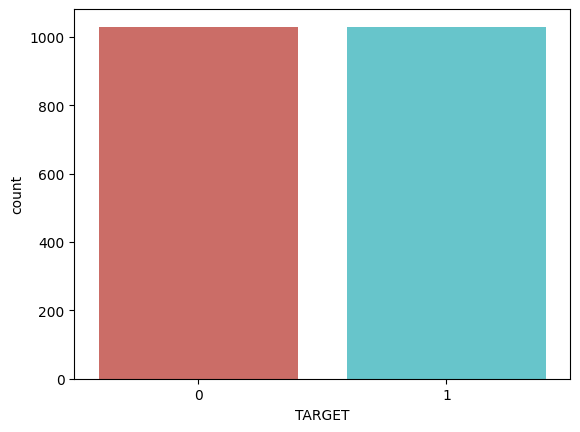

In [123]:
# distribution of TARGET
sns.countplot(x='TARGET', data=df_undersampled, palette='hls')

Text(0.5, 1.0, 'Correlation between features')

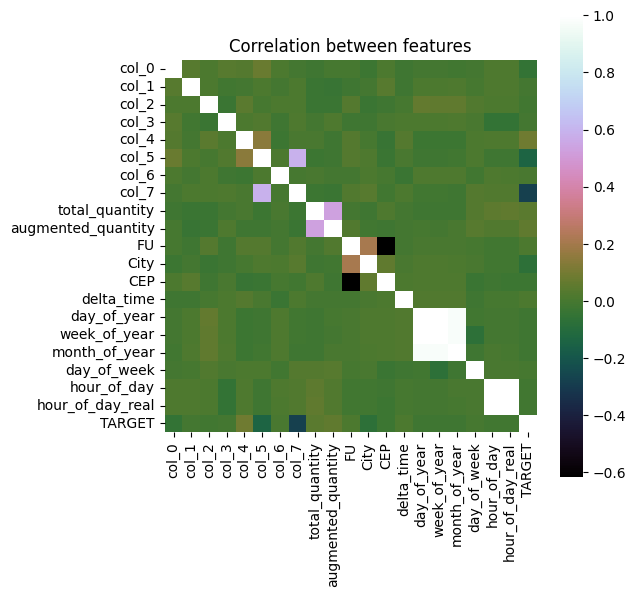

In [124]:
# correlation matrix
corr = df_undersampled.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(corr, vmax=1, square=True, annot=False, cmap='cubehelix')
plt.title('Correlation between features')

We can see that we do have some correlation between columns col_5 and col_7, so we should be careful when using these columns in the model. We must also be careful when using the columns "total_quantity" and "augmented_quantity" because they have a high correlation. We must understand more the bussiness problem to see if this is a valid correlation and if we can use these columns in the model.

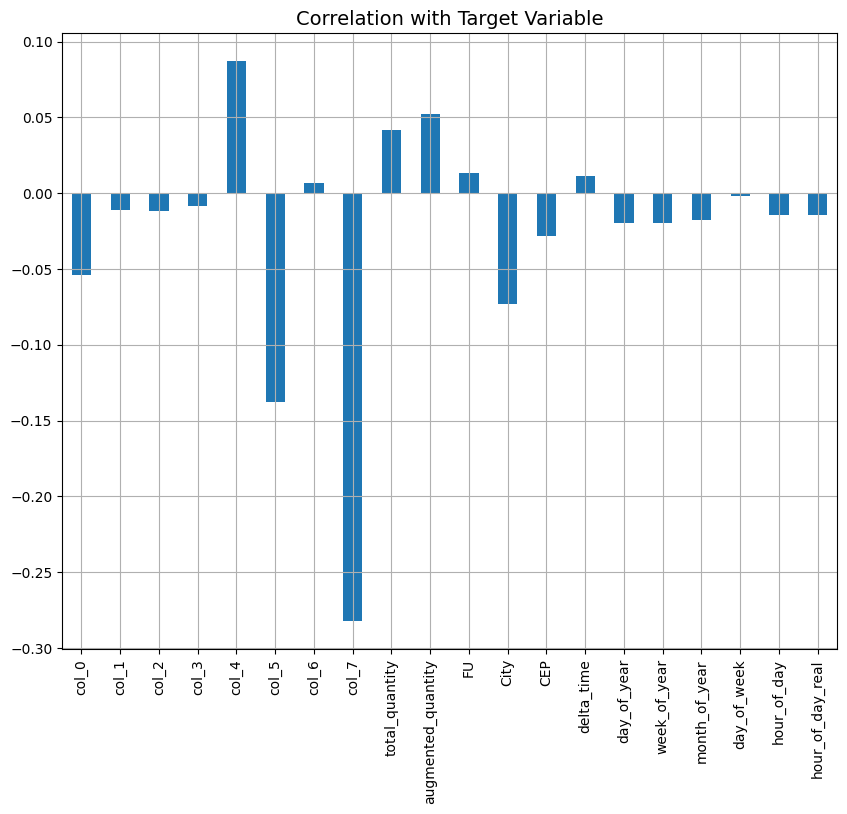

In [125]:
 # plot correlation with target variable
plt.figure(figsize=(10,8))
df_undersampled.drop('TARGET', axis=1).corrwith(df_undersampled['TARGET']).plot(kind='bar', grid=True)
plt.xticks(rotation=90)
plt.title('Correlation with Target Variable', fontsize=14)
plt.show()

The top 4 most correlated columns are:
- col_4, col_5, col_7 and City.

It is interesting to see that the delta_time column has almost no correlation with the TARGET column but also no correlation with the other columns. However, the absense of correlation does not mean that the delta_time column is not important for the model. As we saw before, the delta_time column has a different standard deviation, which means that it could be important for the model. We would know more about this by using a feature selection algorithm.

It is nice to study the distribution of these columns to see if we can find some patterns.

Index(['col_7', 'col_5', 'col_4', 'City', 'delta_time'], dtype='object')


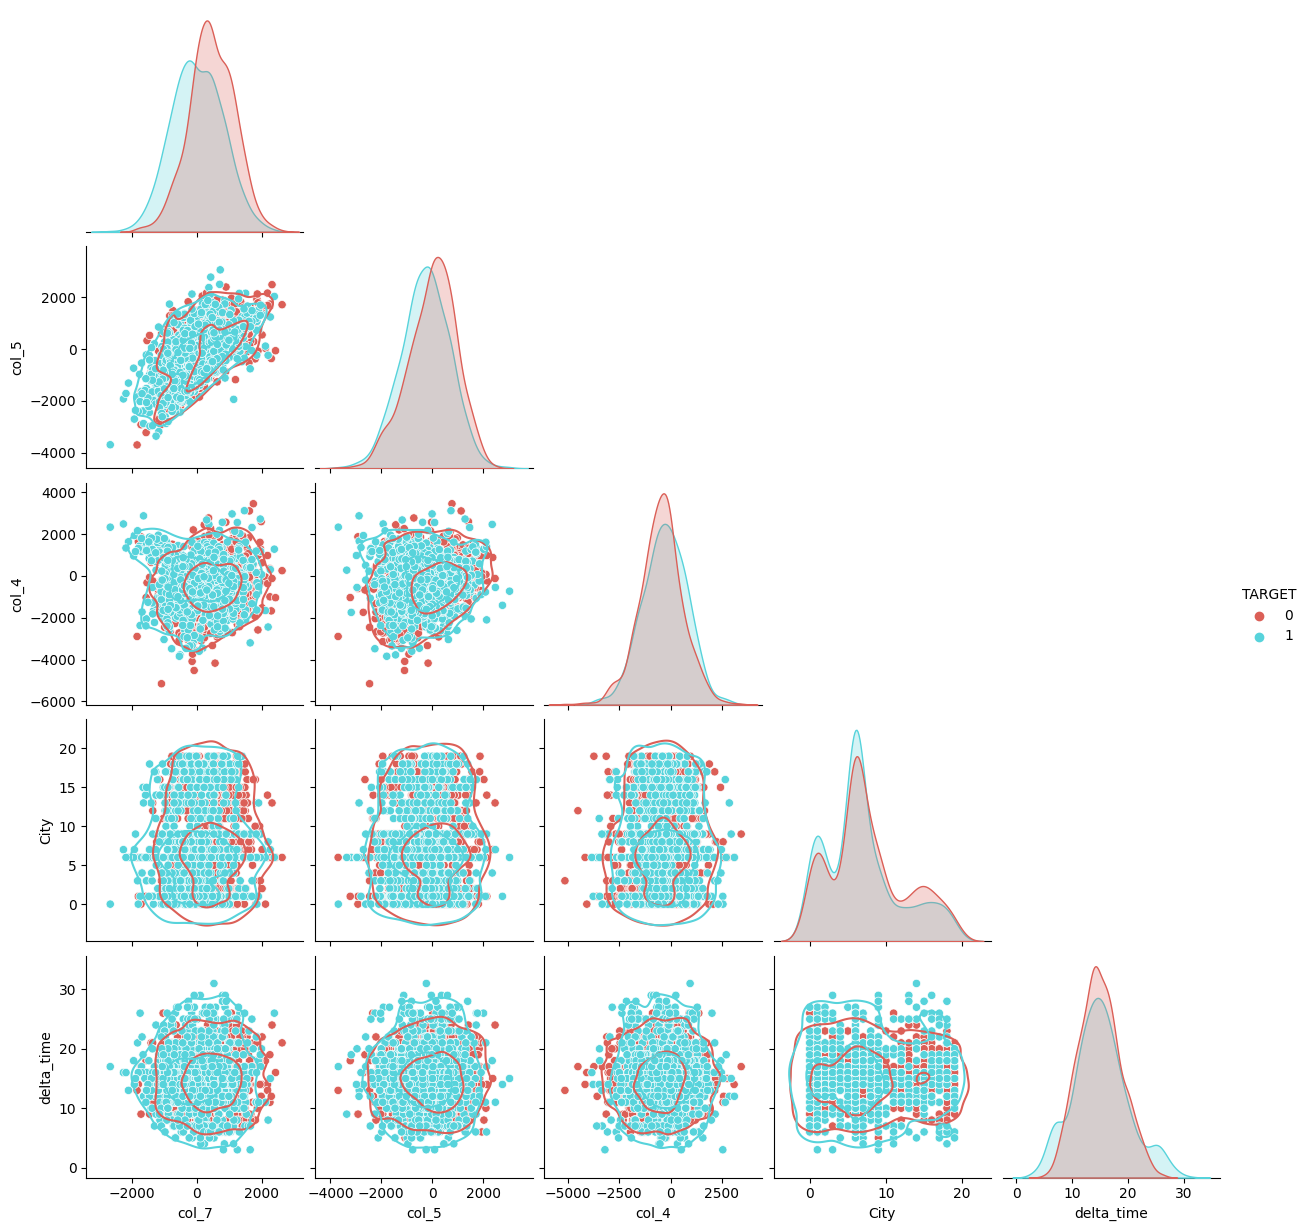

In [126]:
# mark the top 4 features considering absolute value of correlation 
top_features = df_undersampled.drop('TARGET', axis=1).corrwith(df_undersampled['TARGET']).abs().nlargest(4).index
top_features = top_features.append(pd.Index(['delta_time']))
print(top_features)
p=sns.pairplot(df_undersampled, vars=top_features, hue='TARGET', palette='hls',corner=True)
p.map_lower(sns.kdeplot, levels=3, color=".2", cmap='hls')

In this pairplot we can see that the most correlated columns indeed have different distributions, another good indicator that they are important for the model. We can also see that the delta_time column has a different distribution between all those most correlated ones, which is a reinforcement of the fact that it is important for the model. We can see that there are considerably more TARGET values of 1 above ~25 seconds and below ~7.5 seconds compared to the TARGET values of 0 for the distribution of the delta_time column.

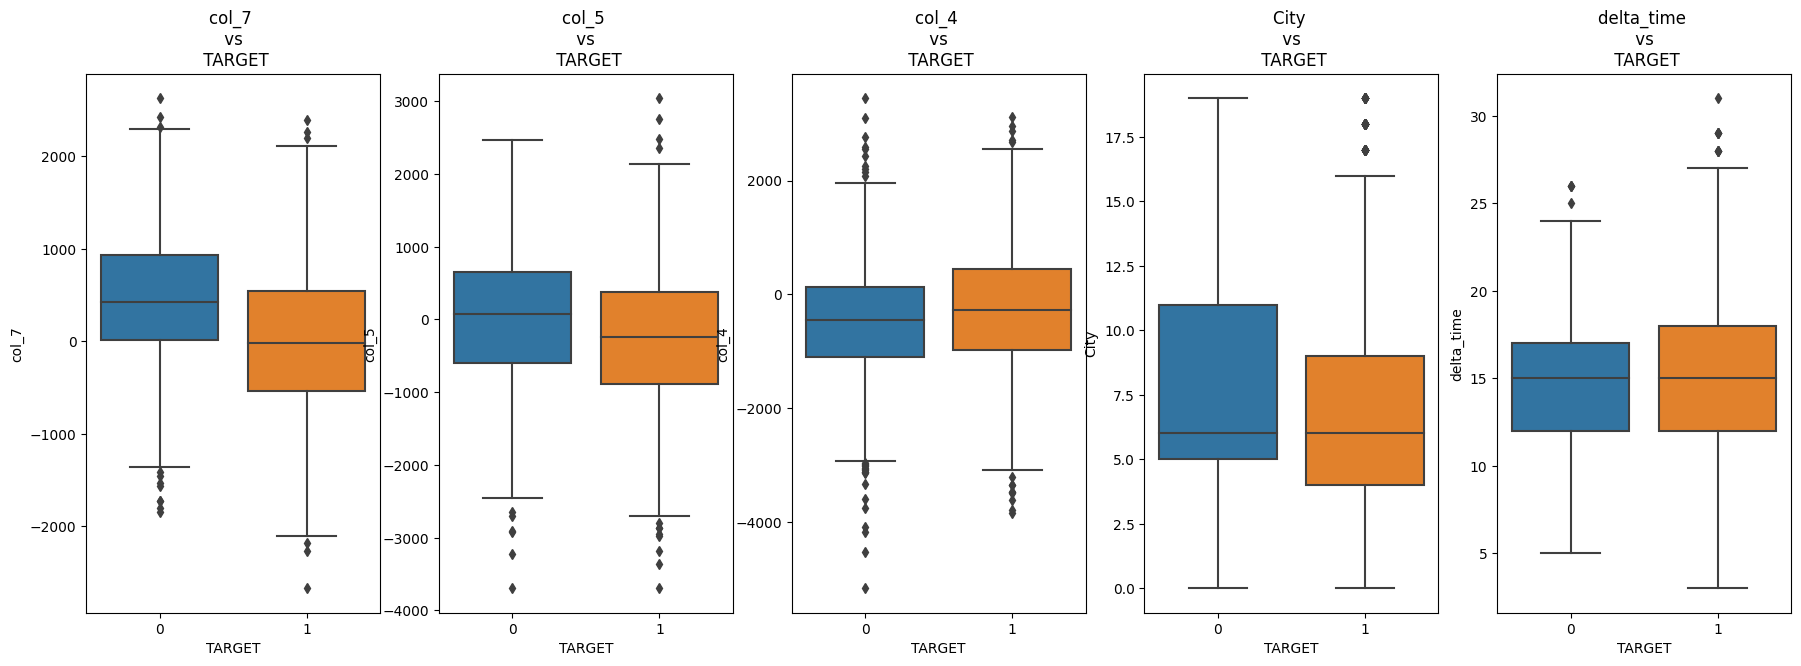

In [127]:
fig , ax = plt.subplots(1,5 , figsize = [22,7])

sns.boxplot(data = df_undersampled , x = 'TARGET' , y = top_features[0] , ax = ax[0])
ax[0].set_title(f'{top_features[0]} \n vs \n TARGET')

sns.boxplot(data = df_undersampled , x = 'TARGET' , y = top_features[1] , ax = ax[1])
ax[1].set_title(f'{top_features[1]} \n vs \n TARGET')

sns.boxplot(data = df_undersampled , x = 'TARGET' , y = top_features[2] , ax = ax[2])
ax[2].set_title(f'{top_features[2]} \n vs \n TARGET')

sns.boxplot(data = df_undersampled , x = 'TARGET' , y = top_features[3] , ax = ax[3])
ax[3].set_title(f'{top_features[3]} \n vs \n TARGET')

sns.boxplot(data = df_undersampled , x = 'TARGET' , y = top_features[4] , ax = ax[4])
ax[4].set_title(f'{top_features[4]} \n vs \n TARGET');

We can see here the boxplot for the most correlated columns and the delta_time column, we can clearly see some outliers. However, we must be careful when removing outliers because we do not know if they are valid values or not. We would need to understand more the bussiness problem to see if they are valid values. I will consider then in our model.

In [128]:
# make a pairplot of all features
# g=sns.pairplot(df_undersampled, hue='TARGET', palette='hls', corner=True)
# g.map_lower(sns.kdeplot, levels=4, color=".2")

With this above cell we can see the pairplot of all features.

As we did not find any patterns in the others columns we have added, we can remove them from the dataset:

In [129]:
#drop columns day_of_year, week_of_year, month_of_year, day_of_week, hour_of_day
df_undersampled = df_undersampled.drop(['day_of_year', 'week_of_year', 'month_of_year', 'day_of_week', 'hour_of_day','hour_of_day_real'], axis=1)
X_test = X_test.drop(['day_of_year', 'week_of_year', 'month_of_year', 'day_of_week', 'hour_of_day','hour_of_day_real'], axis=1)

In [130]:
X_train = df_undersampled.drop('TARGET', axis=1)
y_train = df_undersampled['TARGET']

## Model Training

In [131]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [132]:
#Create a function within many Machine Learning Models
def models(X_train,y_train):

  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, y_train)

  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 50, metric = 'minkowski', p = 2)
  knn.fit(X_train, y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0,max_depth=3)
  tree.fit(X_train, y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0, max_depth=3)
  forest.fit(X_train, y_train)

  #Using XGBClassifier
  import xgboost
  xgb = xgboost.XGBClassifier(n_estimators = 4,use_label_encoder = False,eval_metric = 'logloss')
  xgb.fit(X_train, y_train)

  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, y_train))
  print('[2]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, y_train))
  print('[3]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, y_train))
  print('[4]Decision Tree Classifier Training Accuracy:', tree.score(X_train, y_train))
  print('[5]Random Forest Classifier Training Accuracy:', forest.score(X_train, y_train))
  print('[6]XGBoost Classifier Training Accuracy:', xgb.score(X_train, y_train))

  #return log, knn, svc_lin, svc_rbf, gauss, tree, forest, xgb
  return log,knn, svc_rbf,gauss, tree, forest, xgb

In [133]:
#Get and train all of the models
model = models(X_train,y_train)

[0]Logistic Regression Training Accuracy: 0.6330097087378641
[1]K Nearest Neighbor Training Accuracy: 0.6514563106796116
[2]Support Vector Machine (RBF Classifier) Training Accuracy: 0.7902912621359224
[3]Gaussian Naive Bayes Training Accuracy: 0.6592233009708738
[4]Decision Tree Classifier Training Accuracy: 0.6844660194174758
[5]Random Forest Classifier Training Accuracy: 0.6970873786407767
[6]XGBoost Classifier Training Accuracy: 0.7529126213592233


## Model Evaluation, Validation and Selection

In [134]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
for i in range(len(model)):
   cm = confusion_matrix(y_test, model[i].predict(X_test))
   #extracting TN, FP, FN, TP
   TN, FP, FN, TP = confusion_matrix(y_test, model[i].predict(X_test)).ravel()
   print(cm)
   print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
   print('Model[{}] Testing Precision = "{} !"'.format(i,  (TP) / (TP + FP)))
   print('Model[{}] Testing F1 Score = "{} !"'.format(i,  f1_score(y_test, model[i].predict(X_test))))
   print('----------------------------------------------------')

[[1161  642]
 [  97  161]]
Model[0] Testing Accuracy = "0.6414361960213488 !"
Model[0] Testing Precision = "0.20049813200498132 !"
Model[0] Testing F1 Score = "0.30348727615457116 !"
----------------------------------------------------
[[1428  375]
 [ 143  115]]
Model[1] Testing Accuracy = "0.7486656962639495 !"
Model[1] Testing Precision = "0.23469387755102042 !"
Model[1] Testing F1 Score = "0.3074866310160428 !"
----------------------------------------------------
[[1356  447]
 [  94  164]]
Model[2] Testing Accuracy = "0.737506065016982 !"
Model[2] Testing Precision = "0.2684124386252046 !"
Model[2] Testing F1 Score = "0.37744533947065595 !"
----------------------------------------------------
[[1231  572]
 [ 108  150]]
Model[3] Testing Accuracy = "0.6700630761766133 !"
Model[3] Testing Precision = "0.2077562326869806 !"
Model[3] Testing F1 Score = "0.3061224489795918 !"
----------------------------------------------------
[[1563  240]
 [ 130  128]]
Model[4] Testing Accuracy = "0.820

The results of from the models are not satisfactory. We can see that the best model is the Decision Tree Classifier, but it is not good enough, because besides the training and accuracy scores, the precision and F1 scores are not good enough. We can see that the model is biased towards the majority class, which is not good. We can see that the model is not able to predict the minority class, which is the class that we are interested in.

However, we can refine the model by finding the importance of each feature and removing the ones that are not important for the model. We can do this by using the feature_importances_ attribute of the Decision Tree Classifier model, Random Forest Classifier model and XGBoost model. We can also use logistic regression to find the importance of each feature by using the coef_ attribute.

We can also talk to stakeholders/teammates to understand more the bussiness problem and see if we can find some patterns in the data that can help us to improve the model.

In [135]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
#Get the importance of the features
logreg = model[0]
importances_logreg = pd.DataFrame({'feature':df_undersampled.iloc[:, :-1].columns,'importance':np.round(logreg.coef_[0],3)})
importances_logreg = importances_logreg.sort_values('importance',ascending=False).set_index('feature')
importances_logreg = importances_logreg.abs().sort_values('importance',ascending=False)

In [136]:
# top 5 features
top_5_features_logreg = importances_logreg.head(5).index.tolist()

In [137]:
# get importance from decision tree
tree = model[4]
importances_tree =  pd.DataFrame({'feature':df_undersampled.iloc[:, :-1].columns,'importance':np.round(tree.feature_importances_,3)})
importances_tree = importances_tree.sort_values('importance',ascending=False).set_index('feature')
importances_tree

,importance
feature,
col_7,0.422
delta_time,0.364
col_5,0.090
col_4,0.088
col_6,0.037
col_0,0.000
col_1,0.000
col_2,0.000
col_3,0.000


In [138]:
top_5_features_tree = importances_tree.head(5).index.tolist()

In [139]:
# get importance from random forest
forest = model[5]
importances_forest =  pd.DataFrame({'feature':df_undersampled.iloc[:, :-1].columns,'importance':np.round(forest.feature_importances_,3)})
importances_forest = importances_forest.sort_values('importance',ascending=False).set_index('feature')
importances_forest

,importance
feature,
col_7,0.360
delta_time,0.162
col_5,0.129
col_0,0.087
col_4,0.077
City,0.034
col_1,0.023
col_3,0.022
col_6,0.021


In [140]:
top_5_features_forest = importances_forest.head(5).index.tolist()

In [141]:
# get importance from xgboost
xgb = model[6]
importances_xgb =  pd.DataFrame({'feature':df_undersampled.iloc[:, :-1].columns,'importance':np.round(xgb.feature_importances_,3)})
importances_xgb = importances_xgb.sort_values('importance',ascending=False).set_index('feature')
importances_xgb

,importance
feature,
col_7,0.274
delta_time,0.169
col_4,0.078
CEP,0.076
col_0,0.064
col_5,0.063
augmented_quantity,0.053
City,0.045
col_6,0.039


In [142]:
top_5_features_xgb = importances_xgb.head(5).index.tolist()

In [143]:
# get most repeated features
from collections import Counter
top_features = Counter(top_5_features_logreg + top_5_features_tree + top_5_features_forest + top_5_features_xgb)
top_features = pd.DataFrame(top_features.most_common(10), columns=['feature', 'count'])
top_features

,feature,count
0,col_7,4
1,col_4,4
2,col_0,3
3,delta_time,3
4,col_5,2
5,City,1
6,augmented_quantity,1
7,col_6,1
8,CEP,1


In [144]:
# top features with count>1
top_features = top_features[top_features['count']>1]['feature'].tolist()
top_features

['col_7', 'col_4', 'col_0', 'delta_time', 'col_5']

We can see that delta_time is indeed important for the model as we initially thought.

## Training the model with the most important features

In [145]:
df_undersampled_2 = df_undersampled[df_undersampled.columns.intersection(top_features+['TARGET'])]

X_train_2 = df_undersampled_2.drop('TARGET', axis=1)
y_train_2 = df_undersampled_2['TARGET']
X_test_2 = df_test[df_test.columns.intersection(top_features)]
y_test_2 = df_test['TARGET']

sc_2 = StandardScaler()
X_train_2 = sc_2.fit_transform(X_train_2)
X_test_2 = sc_2.transform(X_test_2)

model_2 = models(X_train_2,y_train_2)

[0]Logistic Regression Training Accuracy: 0.6296116504854369
[1]K Nearest Neighbor Training Accuracy: 0.6946601941747573
[2]Support Vector Machine (RBF Classifier) Training Accuracy: 0.720873786407767
[3]Gaussian Naive Bayes Training Accuracy: 0.6529126213592233
[4]Decision Tree Classifier Training Accuracy: 0.6844660194174758
[5]Random Forest Classifier Training Accuracy: 0.6844660194174758
[6]XGBoost Classifier Training Accuracy: 0.733495145631068


In [146]:
for i in range(len(model_2)):
    cm = confusion_matrix(y_test_2, model_2[i].predict(X_test_2))
    #extracting TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(y_test_2, model_2[i].predict(X_test_2)).ravel()
    print(cm)
    print('Model[{}] Testing Accuracy = "{} !"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print('Model[{}] Testing Precision = "{} !"'.format(i,  (TP) / (TP + FP)))
    print('Model[{}] Testing F1 Score = "{} !"'.format(i,  f1_score(y_test_2, model_2[i].predict(X_test_2))))
    print('----------------------------------------------------')

[[1173  630]
 [  94  164]]
Model[0] Testing Accuracy = "0.6487142163998059 !"
Model[0] Testing Precision = "0.20654911838790932 !"
Model[0] Testing F1 Score = "0.311787072243346 !"
----------------------------------------------------
[[1546  257]
 [ 120  138]]
Model[1] Testing Accuracy = "0.8170790878214459 !"
Model[1] Testing Precision = "0.3493670886075949 !"
Model[1] Testing F1 Score = "0.42266462480857575 !"
----------------------------------------------------
[[1504  299]
 [ 105  153]]
Model[2] Testing Accuracy = "0.8039786511402232 !"
Model[2] Testing Precision = "0.33849557522123896 !"
Model[2] Testing F1 Score = "0.4309859154929578 !"
----------------------------------------------------
[[1250  553]
 [ 103  155]]
Model[3] Testing Accuracy = "0.6817079087821446 !"
Model[3] Testing Precision = "0.2189265536723164 !"
Model[3] Testing F1 Score = "0.32091097308488614 !"
----------------------------------------------------
[[1563  240]
 [ 130  128]]
Model[4] Testing Accuracy = "0.820

In [147]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model_2)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(y_test_2, model_2[i].predict(X_test_2)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(y_test, model_2[i].predict(X_test_2)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.93      0.65      0.76      1803
           1       0.21      0.64      0.31       258

    accuracy                           0.65      2061
   macro avg       0.57      0.64      0.54      2061
weighted avg       0.84      0.65      0.71      2061

0.6487142163998059

Model  1
              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1803
           1       0.35      0.53      0.42       258

    accuracy                           0.82      2061
   macro avg       0.64      0.70      0.66      2061
weighted avg       0.86      0.82      0.83      2061

0.8170790878214459

Model  2
              precision    recall  f1-score   support

           0       0.93      0.83      0.88      1803
           1       0.34      0.59      0.43       258

    accuracy                           0.80      2061
   macro avg       0.64      0.71      0.66      2061
weighte

## Model Tuning

>1, train: 0.631, test: 0.764
>2, train: 0.659, test: 0.766
>3, train: 0.684, test: 0.820
>4, train: 0.695, test: 0.815
>5, train: 0.704, test: 0.827
>6, train: 0.724, test: 0.808
>7, train: 0.743, test: 0.801
>8, train: 0.764, test: 0.756
>9, train: 0.780, test: 0.748
>10, train: 0.796, test: 0.682
>11, train: 0.819, test: 0.705
>12, train: 0.842, test: 0.694
>13, train: 0.864, test: 0.671
>14, train: 0.884, test: 0.689
>15, train: 0.913, test: 0.668
>16, train: 0.932, test: 0.664
>17, train: 0.950, test: 0.646
>18, train: 0.965, test: 0.645
>19, train: 0.978, test: 0.644
>20, train: 0.982, test: 0.643


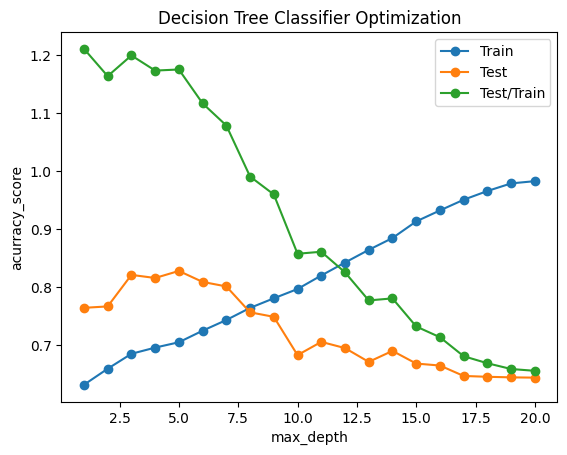

In [148]:
#DecisionTree

y_train = y_train_2
X_train = X_train_2
y_test = y_test_2
X_test = X_test_2

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = DecisionTreeClassifier(max_depth=i,random_state=0)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
d=np.array(test_scores)/np.array(train_scores)
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.plot(values, d, '-o', label='Test/Train')
pyplot.legend()
pyplot.title('Decision Tree Classifier Optimization')
pyplot.ylabel('acurracy_score')
pyplot.xlabel('max_depth')
pyplot.show()

>1, train: 0.723, test: 0.821
>2, train: 0.731, test: 0.797
>3, train: 0.731, test: 0.799
>4, train: 0.733, test: 0.803
>5, train: 0.741, test: 0.804
>6, train: 0.752, test: 0.804
>7, train: 0.756, test: 0.809
>8, train: 0.758, test: 0.807
>9, train: 0.763, test: 0.806
>10, train: 0.766, test: 0.806
>11, train: 0.769, test: 0.804
>12, train: 0.769, test: 0.804
>13, train: 0.771, test: 0.801
>14, train: 0.775, test: 0.796
>15, train: 0.775, test: 0.798
>16, train: 0.790, test: 0.793
>17, train: 0.803, test: 0.785
>18, train: 0.803, test: 0.782
>19, train: 0.802, test: 0.787
>20, train: 0.804, test: 0.781


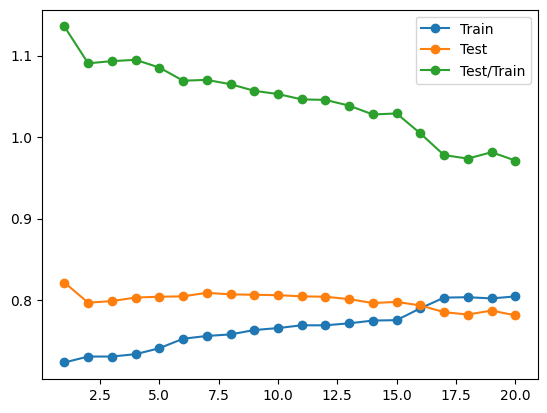

In [149]:
#XGBCLassifier

y_train = y_train_2
X_train = X_train_2
y_test = y_test_2
X_test = X_test_2

import xgboost
from matplotlib import pyplot
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = xgboost.XGBClassifier(n_estimators =i,use_label_encoder = False, eval_metric = 'logloss')
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
d=np.array(test_scores)/np.array(train_scores)
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.plot(values, d, '-o', label='Test/Train')
pyplot.legend()
pyplot.show()

>1, train: 1.000, test: 0.627
>2, train: 0.804, test: 0.787
>3, train: 0.814, test: 0.654
>4, train: 0.777, test: 0.770
>5, train: 0.777, test: 0.675
>6, train: 0.751, test: 0.770
>7, train: 0.756, test: 0.705
>8, train: 0.742, test: 0.783
>9, train: 0.745, test: 0.724
>10, train: 0.733, test: 0.783
>11, train: 0.735, test: 0.727
>12, train: 0.729, test: 0.779
>13, train: 0.729, test: 0.738
>14, train: 0.722, test: 0.783
>15, train: 0.727, test: 0.740
>16, train: 0.718, test: 0.779
>17, train: 0.720, test: 0.752
>18, train: 0.719, test: 0.785
>19, train: 0.725, test: 0.760
>20, train: 0.718, test: 0.790
>21, train: 0.725, test: 0.764
>22, train: 0.711, test: 0.789
>23, train: 0.720, test: 0.766
>24, train: 0.715, test: 0.793
>25, train: 0.719, test: 0.771
>26, train: 0.716, test: 0.797
>27, train: 0.717, test: 0.781
>28, train: 0.712, test: 0.799
>29, train: 0.717, test: 0.782
>30, train: 0.710, test: 0.803
>31, train: 0.711, test: 0.783
>32, train: 0.709, test: 0.800
>33, train: 0.712

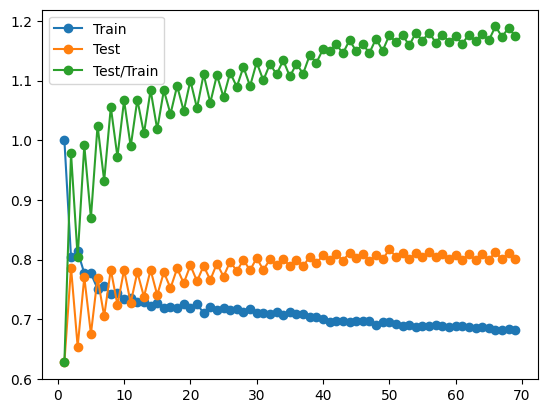

In [150]:
# evaluate knn performance on train and test sets with different numbers of neighbors
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from matplotlib import pyplot

y_train = y_train_2
X_train = X_train_2
y_test = y_test_2
X_test = X_test_2

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 70)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	model = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	model.fit(X_train, y_train)
	# evaluate on the train dataset
	train_yhat = model.predict(X_train)
	train_acc = accuracy_score(y_train, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = model.predict(X_test)
	test_acc = accuracy_score(y_test, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
d=np.array(test_scores)/np.array(train_scores)
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.plot(values, d, '-o', label='Test/Train')
pyplot.legend()
pyplot.show()

## Exporting the model

In [151]:
# exporting the model_2[2] to joblib
from joblib import dump
dump(model_2[2], '../data/model.joblib')

# exporting scaler to pickle
import pickle
pickle.dump(sc_2, open('../data/scaler.pkl','wb'))

## Conclusion, Next Steps and Deployment Plan:

The model is not good enough to be deployed. We can see that the model is biased towards the majority class, which is not good. We can see that the model is not able to predict the minority class, which is the class that we are interested in, because it lacks precision, F1 scores and recall. We tried to improve the model by finding the importance of each feature and removing the ones that are not important, it did improve the model, but it is still not good enough. We need to discuss with stakeholders/teammates to understand more the data and the bussiness problem in order to have an insight to what is happening and find some new patterns in the data that can help us to improve our model. We can also try cross validation to test and improve our model or use neural networks to see if we can have any improvement.

Having a good model, we can study how to deploy it. If it is a fraud detection model of individual transactions we must priorize the real time detection, because we do not want to wait for a batch of transactions to be processed to detect a fraud. If it is a fraud detection model of a batch of transactions we can deploy it in a batch platform, like Apache Spark. If it is a fraud detection model of a web application we can deploy it in a web application, like a Django app.

## References:

Function to model training and evaluation based on: https://github.com/mdsohaib/Breast-Cancer-prediction/blob/master/Breast_Cancer_Detection.ipynb